In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

In [124]:
data=pd.read_csv("employee_survey.csv")
data

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2070,Male,47,Married,Lead,16,Marketing,Part-Time,1,3,...,6.8,Public Transport,15,8,28,8,Master,False,58.0,1
3021,2072,Female,47,Married,Lead,8,IT,Contract,3,1,...,6.9,Car,28,8,21,8,Master,True,54.0,1
3022,2145,Male,41,Married,Lead,17,IT,Full-Time,1,1,...,6.1,Public Transport,9,6,23,3,Master,True,58.5,1
3023,2168,Female,54,Married,Lead,16,IT,Full-Time,1,5,...,7.7,Public Transport,18,10,30,7,Master,True,58.0,1


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmpID                  3025 non-null   int64  
 1   Gender                 3025 non-null   object 
 2   Age                    3025 non-null   int64  
 3   MaritalStatus          3025 non-null   object 
 4   JobLevel               3025 non-null   object 
 5   Experience             3025 non-null   int64  
 6   Dept                   3025 non-null   object 
 7   EmpType                3025 non-null   object 
 8   WLB                    3025 non-null   int64  
 9   WorkEnv                3025 non-null   int64  
 10  PhysicalActivityHours  3025 non-null   float64
 11  Workload               3025 non-null   int64  
 12  Stress                 3025 non-null   int64  
 13  SleepHours             3025 non-null   float64
 14  CommuteMode            3025 non-null   object 
 15  Comm

In [126]:
data.describe()

,EmpID,Age,Experience,WLB,WorkEnv,PhysicalActivityHours,Workload,Stress,SleepHours,CommuteDistance,NumCompanies,TeamSize,NumReports,TrainingHoursPerYear,JobSatisfaction
count,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,1513.000000,35.741818,9.082645,3.061157,3.029091,2.029620,2.966612,1.736529,7.005983,13.473719,4.253554,16.516033,2.383140,37.301653,3.386777
std,873.386608,10.191833,7.073344,1.447001,1.415317,0.966014,1.401486,1.064242,1.002652,8.395249,3.382501,6.638419,3.058131,13.569772,1.260599
min,1.000000,22.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,0.000000,10.000000,1.000000
25%,757.000000,27.000000,3.000000,2.000000,2.000000,1.300000,2.000000,1.000000,6.300000,6.000000,1.000000,11.000000,0.000000,23.500000,3.000000
50%,1513.000000,34.000000,8.000000,3.000000,3.000000,2.000000,3.000000,1.000000,7.000000,13.000000,4.000000,16.000000,0.000000,40.000000,4.000000
75%,2269.000000,43.000000,14.000000,4.000000,4.000000,2.700000,4.000000,2.000000,7.700000,21.000000,7.000000,22.000000,5.000000,46.500000,4.000000
max,3025.000000,60.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,29.000000,12.000000,30.000000,9.000000,64.500000,5.000000


In [127]:
data.duplicated().sum()

0

In [128]:
data.isna().sum()

EmpID                    0
Gender                   0
Age                      0
MaritalStatus            0
JobLevel                 0
Experience               0
Dept                     0
EmpType                  0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteMode              0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
EduLevel                 0
haveOT                   0
TrainingHoursPerYear     0
JobSatisfaction          0
dtype: int64

In [129]:
data.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5


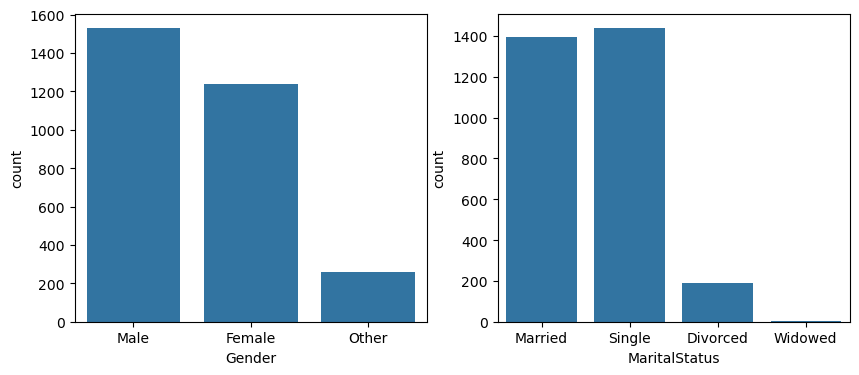

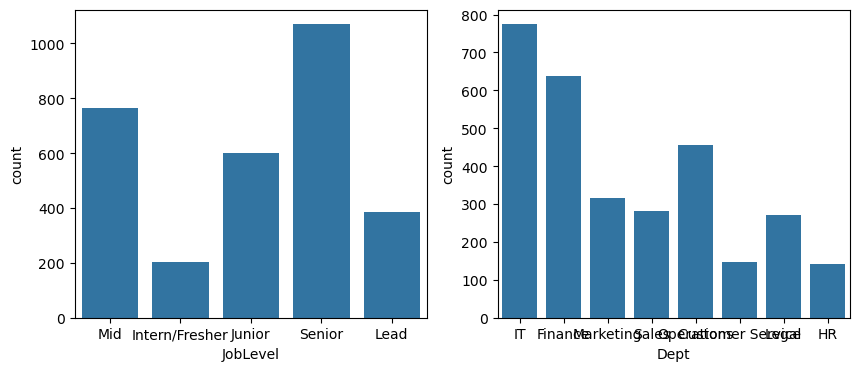

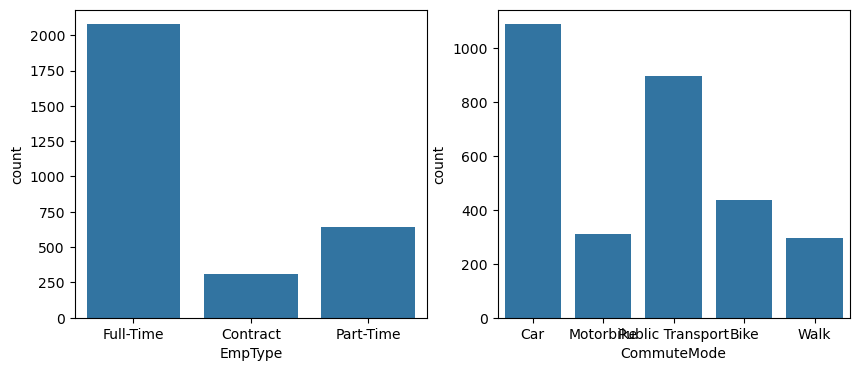

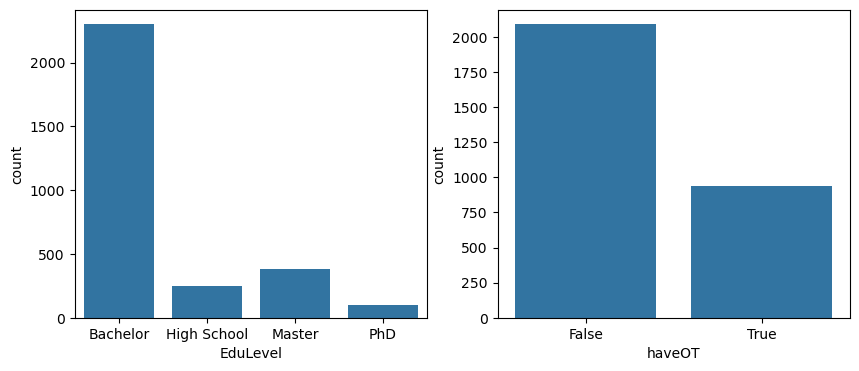

In [130]:
catg_cols=['Gender','MaritalStatus','JobLevel','Dept','EmpType','CommuteMode','EduLevel','haveOT']
i=0
while i<8:
    fig= plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=catg_cols[i],data=data)
    i+=1
    plt.subplot(1,2,2)
    sns.countplot(x=catg_cols[i],data=data)
    i+=1

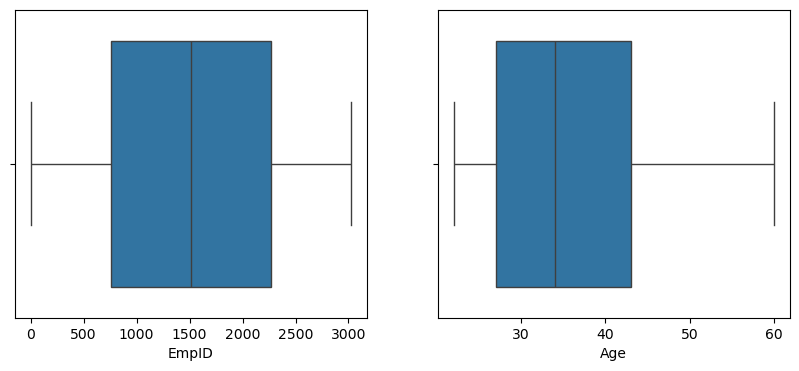

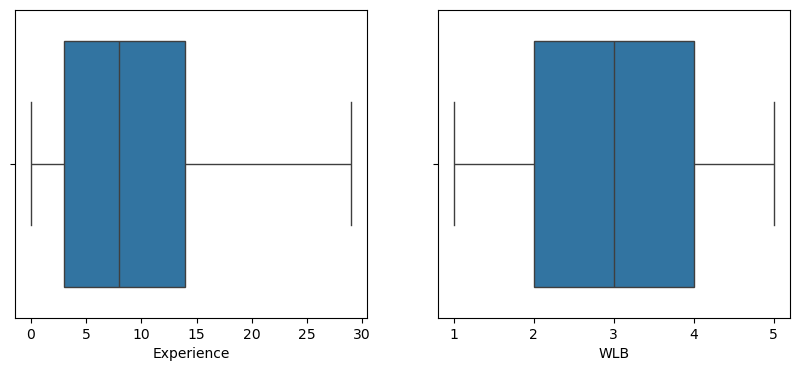

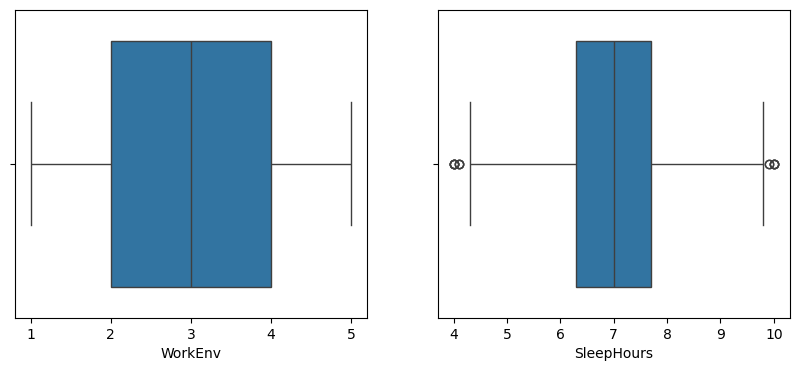

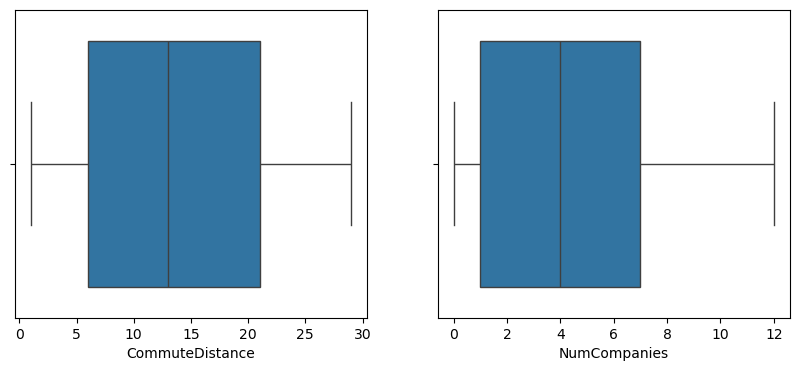

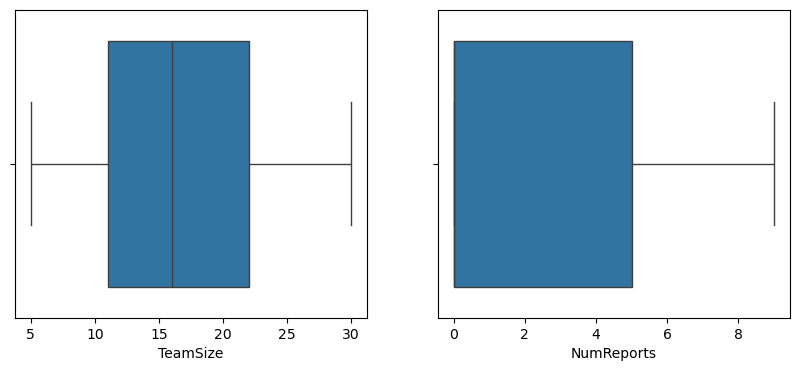

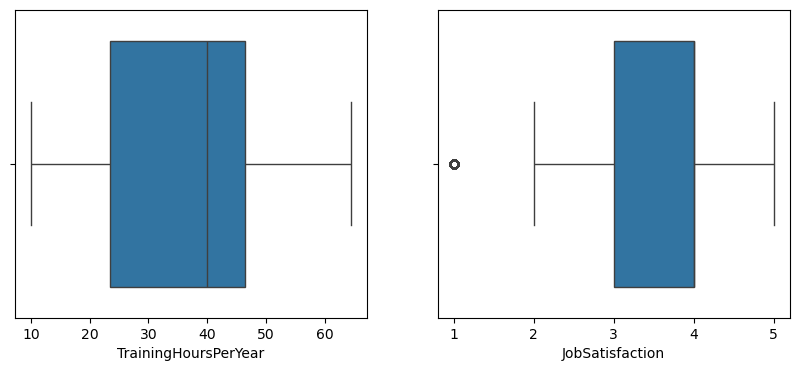

In [131]:
num_cols=['EmpID','Age','Experience','WLB','WorkEnv','SleepHours','CommuteDistance','NumCompanies','TeamSize','NumReports','TrainingHoursPerYear','JobSatisfaction']
i=0
while i<12:
    col_graphs=plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i],data=data)
    i+=1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i],data=data)
    i+=1

In [132]:
one_hot_encode=pd.get_dummies(data, columns=['Gender','MaritalStatus','JobLevel','Dept','EmpType','CommuteMode','EduLevel','haveOT'])
one_hot_encode

,EmpID,Age,Experience,WLB,WorkEnv,PhysicalActivityHours,Workload,Stress,SleepHours,CommuteDistance,...,CommuteMode_Car,CommuteMode_Motorbike,CommuteMode_Public Transport,CommuteMode_Walk,EduLevel_Bachelor,EduLevel_High School,EduLevel_Master,EduLevel_PhD,haveOT_False,haveOT_True
0,6,32,7,1,1,2.5,2,1,7.6,20,...,True,False,False,False,True,False,False,False,False,True
1,11,34,12,1,1,1.8,2,2,7.9,15,...,True,False,False,False,True,False,False,False,True,False
2,33,23,1,2,4,2.1,5,4,6.5,17,...,False,True,False,False,True,False,False,False,False,True
3,20,29,6,2,2,1.9,3,1,7.5,13,...,False,False,True,False,True,False,False,False,False,True
4,28,23,1,3,1,3.7,2,1,4.9,20,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2070,47,16,1,3,1.9,4,3,6.8,15,...,False,False,True,False,False,False,True,False,True,False
3021,2072,47,8,3,1,1.5,2,1,6.9,28,...,True,False,False,False,False,False,True,False,False,True
3022,2145,41,17,1,1,1.3,1,1,6.1,9,...,False,False,True,False,False,False,True,False,False,True
3023,2168,54,16,1,5,2.5,3,3,7.7,18,...,False,False,True,False,False,False,True,False,False,True


In [133]:
x=data.drop(columns=['EmpID','JobSatisfaction'])
y=data['JobSatisfaction']

In [134]:
from sklearn.preprocessing import OneHotEncoder
x=pd.get_dummies(x, columns=['Gender','MaritalStatus','JobLevel','Dept','EmpType','CommuteMode','EduLevel','haveOT'],drop_first=True)

In [135]:
x.shape

(3025, 39)

In [136]:
y.shape

(3025,)

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [138]:
print(x_train.shape)
print(x_test.shape)
print(x_train.shape)
print(x_test.shape)

(2117, 39)
(908, 39)
(2117, 39)
(908, 39)


1.linear regresion

In [140]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)
lin_pred= lin_model.predict(x_test)

In [141]:
mse = mean_squared_error(y_test, lin_pred)
r2 = r2_score(y_test, lin_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.2008860881676233
R^2 Score: 0.28076712291910777


<Axes: ylabel='JobSatisfaction'>

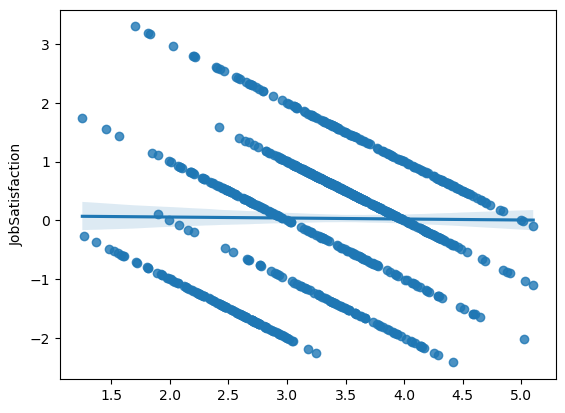

In [142]:
sns.regplot(x=lin_pred, y=y_test-lin_pred,data=data)

2.logistic regression

In [144]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression(max_iter= 7000, random_state=42)
logistic_model.fit(x_train,y_train)

LogisticRegression(max_iter=7000, random_state=42)

In [145]:
log_pred=logistic_model.predict(x_test)
log_pred

array([4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 1, 4, 1, 1, 4, 4, 4, 4, 4,
       4, 4, 5, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 1, 4, 1, 1, 1, 4, 5,
       3, 4, 4, 1, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 1, 1, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5, 4, 4, 4, 3, 4, 4, 3, 1, 4, 4,
       1, 4, 4, 1, 4, 3, 4, 3, 4, 4, 3, 4, 3, 1, 4, 4, 3, 4, 4, 3, 1, 1,
       4, 1, 1, 4, 4, 4, 4, 1, 4, 3, 3, 4, 4, 4, 2, 1, 3, 1, 1, 3, 1, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 5, 4, 1, 4, 1, 4, 4, 1,
       4, 4, 3, 3, 4, 4, 4, 1, 1, 4, 4, 4, 1, 3, 4, 4, 4, 4, 4, 4, 4, 3,
       3, 3, 4, 4, 3, 4, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 3, 4,
       3, 5, 4, 3, 1, 4, 4, 1, 1, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 4, 3, 4, 4, 4, 4, 1, 1, 1, 3, 4, 3, 4, 4,
       4, 1, 4, 1, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4,
       4, 4, 3, 4, 3, 4, 3, 1, 4, 4, 1, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 1, 4, 4, 1, 4, 3, 4, 4, 4, 3, 4, 4, 4,

In [146]:
log_accuracy= accuracy_score(y_test ,log_pred)
log_report= classification_report(y_test, log_pred)
log_conf_matrix= confusion_matrix(y_test, log_pred)
print(f'accuracy: {log_accuracy}')
print(f'report: {report}')
print(f'conf_matrix: {conf_matrix}')

accuracy: 0.5110132158590308
report:               precision    recall  f1-score   support

           1       0.54      0.61      0.57       134
           2       0.00      0.00      0.00        88
           3       0.38      0.31      0.34       163
           4       0.54      0.91      0.68       360
           5       0.24      0.02      0.04       163

    accuracy                           0.51       908
   macro avg       0.34      0.37      0.33       908
weighted avg       0.41      0.51      0.42       908

conf_matrix: [[ 82   1  38  13   0]
 [  7   0   4  77   0]
 [ 47   0  51  63   2]
 [  3   1  18 327  11]
 [ 13   0  22 124   4]]


3.desicion treee

In [148]:
from sklearn.tree import DecisionTreeClassifier
des_tree = DecisionTreeClassifier(random_state=42)
des_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [149]:
tree_pred = des_tree.predict(x_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
print(f'Accuracy Score: {tree_accuracy:.4f}')
tree_report= classification_report(y_test, tree_pred)
tree_conf_matrix= confusion_matrix(y_test, tree_pred)
print(f'report: {tree_report}')
print(f'conf_matrix: {tree_conf_matrix}')

Accuracy Score: 0.3469
report:               precision    recall  f1-score   support

           1       0.41      0.39      0.40       134
           2       0.08      0.08      0.08        88
           3       0.22      0.24      0.23       163
           4       0.51      0.50      0.50       360
           5       0.22      0.22      0.22       163

    accuracy                           0.35       908
   macro avg       0.29      0.29      0.29       908
weighted avg       0.35      0.35      0.35       908

conf_matrix: [[ 52  12  35  21  14]
 [  7   7  16  41  17]
 [ 38  15  39  46  25]
 [ 15  36  58 181  70]
 [ 15  15  29  68  36]]


4.random forest

In [151]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [152]:
ran_pred = random_forest.predict(x_test)
ran_accuracy = accuracy_score(y_test, ran_pred)
ran_report= classification_report(y_test, ran_pred)
ran_conf_matrix= confusion_matrix(y_test, ran_pred)
print(f'Accuracy Score: {ran_accuracy:.4f}')
print(f'report: {ran_report}')
print(f'conf_matrix: {ran_conf_matrix}')



Accuracy Score: 0.4670
report:               precision    recall  f1-score   support

           1       0.49      0.37      0.42       134
           2       0.00      0.00      0.00        88
           3       0.33      0.14      0.20       163
           4       0.48      0.96      0.64       360
           5       0.50      0.04      0.07       163

    accuracy                           0.47       908
   macro avg       0.36      0.30      0.26       908
weighted avg       0.41      0.47      0.36       908

conf_matrix: [[ 49   0  25  59   1]
 [  7   0   1  80   0]
 [ 28   0  23 111   1]
 [  4   0   6 346   4]
 [ 11   0  14 132   6]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5.ada boost

In [154]:
from sklearn.ensemble import AdaBoostClassifier
Ada_boost = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=42)
Ada_boost.fit(x_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1, random_state=42)

In [155]:
Ada_pred = Ada_boost.predict(x_test)
accuracy = accuracy_score(y_test, Ada_pred)
print(f'Accuracy Score: {accuracy:.4f}')

Accuracy Score: 0.4736


6.XG boost

In [173]:
y

0       5
1       5
2       5
3       5
4       5
       ..
3020    1
3021    1
3022    1
3023    1
3024    1
Name: JobSatisfaction, Length: 3025, dtype: int64

In [181]:
YY=data['JobSatisfaction']-1
print(YY.unique())

[4 3 2 1 0]


In [193]:
X_train,X_test,Y_train,Y_test=train_test_split(x,YY, test_size=0.3, random_state=42)

In [199]:
from xgboost import XGBClassifier, XGBRegressor
XG_boost_model = XGBClassifier()
XG_boost_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [201]:
XG_pred = XG_boost_model.predict(X_test)
xg_accuracy = accuracy_score(Y_test, XG_pred)
print(f'Accuracy Score: {xg_accuracy:.4f}')
print(classification_report(Y_test, XG_pred))
print(confusion_matrix(Y_test, XG_pred))

Accuracy Score: 0.4780
              precision    recall  f1-score   support

           0       0.51      0.52      0.51       134
           1       0.10      0.03      0.05        88
           2       0.30      0.28      0.29       163
           3       0.56      0.77      0.65       360
           4       0.42      0.23      0.29       163

    accuracy                           0.48       908
   macro avg       0.38      0.37      0.36       908
weighted avg       0.43      0.48      0.44       908

[[ 70   5  36  16   7]
 [  8   3   9  63   5]
 [ 41   4  46  60  12]
 [  6  13  36 278  27]
 [ 13   4  27  82  37]]


7.KNN

In [205]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [207]:
knn_pred = knn_model.predict(x_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
print(f'Accuracy Score: {knn_accuracy:.4f}')
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))


Accuracy Score: 0.3370
              precision    recall  f1-score   support

           1       0.29      0.25      0.27       134
           2       0.17      0.10      0.13        88
           3       0.22      0.25      0.23       163
           4       0.42      0.59      0.49       360
           5       0.22      0.08      0.12       163

    accuracy                           0.34       908
   macro avg       0.26      0.25      0.25       908
weighted avg       0.31      0.34      0.31       908

[[ 33   2  30  66   3]
 [ 11   9  16  49   3]
 [ 29   8  40  81   5]
 [ 29  19  65 211  36]
 [ 11  14  33  92  13]]


8.Naive Bayes

In [211]:
from sklearn.naive_bayes import GaussianNB
Bayes_model = GaussianNB()
Bayes_model.fit(x_train, y_train)

GaussianNB()

In [213]:
bays_pred = Bayes_model.predict(x_test)

bays_accuracy = accuracy_score(y_test, bays_pred)
print(f'Accuracy Score: {bays_accuracy:.4f}')
print(classification_report(y_test, bays_pred))
print(confusion_matrix(y_test, bays_pred))

Accuracy Score: 0.1817
              precision    recall  f1-score   support

           1       0.56      0.04      0.07       134
           2       0.11      0.60      0.19        88
           3       0.00      0.00      0.00       163
           4       1.00      0.00      0.01       360
           5       0.25      0.65      0.36       163

    accuracy                           0.18       908
   macro avg       0.38      0.26      0.12       908
weighted avg       0.53      0.18      0.10       908

[[  5 101   0   0  28]
 [  0  53   0   0  35]
 [  2  74   0   0  87]
 [  2 182   0   1 175]
 [  0  56   1   0 106]]


9.SVM

In [217]:
from sklearn.svm import SVC
svc_model=SVC(kernel='linear')
svc_model.fit(x_train,y_train)

SVC(kernel='linear')

In [219]:
svc_pred=svc_model.predict(x_test)
svc_accuracy=accuracy_score(y_test, svc_pred)
svc_report= classification_report(y_test, svc_pred)
svc_conf_matrix= confusion_matrix(y_test, svc_pred)
print(f'Accuracy Score: {svc_accuracy:.4f}')
print(f'report: {ran_report}')
print(f'conf_matrix: {ran_conf_matrix}')


Accuracy Score: 0.5275
report:               precision    recall  f1-score   support

           1       0.49      0.37      0.42       134
           2       0.00      0.00      0.00        88
           3       0.33      0.14      0.20       163
           4       0.48      0.96      0.64       360
           5       0.50      0.04      0.07       163

    accuracy                           0.47       908
   macro avg       0.36      0.30      0.26       908
weighted avg       0.41      0.47      0.36       908

conf_matrix: [[ 49   0  25  59   1]
 [  7   0   1  80   0]
 [ 28   0  23 111   1]
 [  4   0   6 346   4]
 [ 11   0  14 132   6]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
